In [1]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [2]:
%%bash
cd .. && make clean && make

src/Exercice5_students.cpp:145:9: warning: unused variable 'Nsteps' [-Wunused-variable]
  145 |         double Nsteps;
      |                ^~~~~~
In file included from src/Exercice5_students.cpp:7:
src/ConfigFile.tpp:67:8: warning: variable 'out' is used uninitialized whenever 'if' condition is false [-Wsometimes-uninitialized]
   67 |   if ( val != configMap.end() ) {
      |        ^~~~~~~~~~~~~~~~~~~~~~
src/Exercice5_students.cpp:160:33: note: in instantiation of function template specialization 'ConfigFile::get<double>' requested here
  160 |         const double tfin = configFile.get<double>("tfin");
      |                                        ^
src/ConfigFile.tpp:74:10: note: uninitialized use occurs here
   74 |   return out;
      |          ^~~
src/ConfigFile.tpp:67:3: note: remove the 'if' if its condition is always true
   67 |   if ( val != configMap.end() ) {
      |   ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   68 |     std::istringstream iss(val->second);
   69 |     iss >> o

In [3]:
config_name = 'corail'
conf = load_conf(config_name)

In [4]:
# params, data_x, data_v, data_f
dataset = run_with_params(
    config_name,
    [{}]
    # [{'tfin': 10}]
    # gen_variations({
    #     'param': [...],
    # })
)

Running simulations... Done 1/1


[ConfigFile] Ligne sans '=' : "# Physique :"


# Plots!

In [5]:
%matplotlib inline

params, x, v, f, h0 = dataset[0]
t = f[:,0]
h = f[:,1:]
X, Y = np.meshgrid(x, t)
plt.contourf(X, Y, h, levels=20, cmap=plt.get_cmap('viridis'))
plt.colorbar()
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$t$ [s]')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

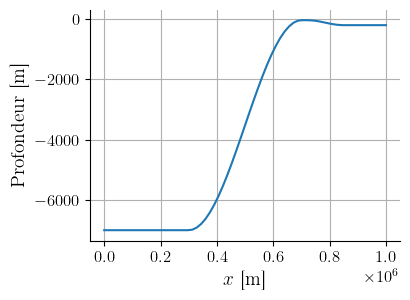

In [8]:
plt.plot(x, -h0)
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'Profondeur [m]')
plt.grid()

In [30]:
# Do your stuff here pwease
%matplotlib qt
import matplotlib.animation as mpla

params, x, v, f, _ = dataset[0]

plt.figure(figsize=(8, 8))

line, = plt.plot(x, f[0,1:], 'x-', markersize=5)
size = f.shape[0]

def animate(i) -> Any:
    idx = i % size
    line.set_data(x, f[idx,1:])

anim = mpla.FuncAnimation(plt.gcf(), animate, interval=20, cache_frame_data=True, frames=size)

plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$y$ [m]')
plt.ylim(-2, 2)
plt.grid()
# anim.save('yeet.gif')